http://mmnet.iis.sinica.edu.tw/dl/wowah/

https://www.kaggle.com/mylesoneill/warcraft-avatar-history

In [29]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
% matplotlib inline

In [184]:
dirname = '../Data/wowah/output/'      # Adjust to your dir as needed.
filename = 'wowah_data2.csv'
filepath = os.path.join(dirname, filename)

In [185]:
df = pd.read_csv(filepath)

In [186]:
df.head()

,char,level,race,charclass,zone,guild,timestamp,sample_idx
0,0,5,Orc,Warrior,Durotar,-1,12/31/05 23:59:46,1
1,1,9,Orc,Shaman,Durotar,-1,12/31/05 23:59:46,1
2,2,13,Orc,Shaman,Durotar,-1,12/31/05 23:59:52,1
3,3,14,Orc,Warrior,Durotar,0,12/31/05 23:59:52,1
4,4,14,Orc,Shaman,Durotar,-1,12/31/05 23:59:52,1


#### later on in the study I find out that the char is not unique identity 

In [187]:
df[df.char==61].tail()

,char,level,race,charclass,zone,guild,timestamp,sample_idx
2805487,61,60,Orc,Warrior,Orgrimmar,65,03/19/06 12:33:26,-76
2805779,61,60,Orc,Warrior,Orgrimmar,65,03/19/06 12:43:25,-77
6999591,61,1,Orc,Hunter,Durotar,-1,08/13/06 11:39:50,71
6999777,61,2,Orc,Hunter,Durotar,-1,08/13/06 11:49:49,72
6999967,61,2,Orc,Hunter,Durotar,-1,08/13/06 11:59:48,73


#### need to reindex the char

In [157]:
print('there are ', len(df.char.unique()), 'char id\'s, the highest char id value is ', df.char.unique().max())

there are  78172 char id's, the highest char id value is  78730


In [183]:
next_char_id = df.char.unique().max()+1
df_reindex = df

char_groups = df.groupby('char')
for char, grp in char_groups:
    levels = grp.level.tolist()
    steps = [i-j for i,j in zip(levels[1:],levels[:-1])]
    idx = [i for i,s in enumerate(steps) if s not in [0,1]]
    if idx:
        idx = [i + 1 for i in idx]
        for i in idx:
            print(char)
            indexes = grp[i:].index
            df_reindex.loc[indexes, 'char'] = next_char_id
            next_char_id += 1

54
61
64
67
72
74
74
87
87
88
100
138
138
138
138
138
138
138
138
138
138
181
191
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
196
201
202
204
247
273
289
291
295
302
321
327
328
341
351
360
367
367
374
375
378
378
378
432
437
446
449
449
449
449
473


KeyboardInterrupt: 

In [198]:
levels = df[df.char==138].level.tolist()
steps = [i-j for i,j in zip(levels[1:],levels[:-1])]
idx = [i for i,s in enumerate(steps) if s not in [0,1]]
idx

[1806, 1813, 1876, 1880, 1902, 1903, 2209, 2211, 2214, 2242]

In [200]:
levels[1805:1876]

[60,
 60,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60]

### drop records beyond 2008-10-01

In [8]:
def isafter20081001(tt):
    return (int(tt[6:8])==8 and int(tt[:2])>=10) or int(tt[6:8])>8

df['isafter20081001'] = df.timestamp.apply(isafter20081001)

In [9]:
df = df[df.isafter20081001==False]

In [10]:
df.drop('isafter20081001', axis=1, inplace=True)
df.tail()

,char,level,race,charclass,zone,guild,timestamp,sample_idx
33975320,44730,70,Blood Elf,Mage,Eye of the Storm,101,09/30/08 23:57:49,-142
33975321,55051,70,Blood Elf,Mage,Serpentshrine Cavern,103,09/30/08 23:57:49,-142
33975322,67862,70,Blood Elf,Mage,Terokkar Forest,205,09/30/08 23:57:49,-142
33975323,69475,70,Blood Elf,Mage,The Shattered Halls,101,09/30/08 23:57:49,-142
33975324,66019,70,Blood Elf,Mage,Netherstorm,282,09/30/08 23:57:49,-142


### convert timestamp to pandas datetime format

In [11]:
def to_datetime(tt):
    return pd.to_datetime(tt, format='%m/%d/%y %H:%M:%S')

df['datetime'] = df.timestamp.apply(to_datetime)
df.drop('timestamp', axis=1, inplace = True)
df.head()

,char,level,race,charclass,zone,guild,sample_idx,datetime
0,0,5,Orc,Warrior,Durotar,-1,1,2005-12-31 23:59:46
1,1,9,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:46
2,2,13,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52
3,3,14,Orc,Warrior,Durotar,0,1,2005-12-31 23:59:52
4,4,14,Orc,Shaman,Durotar,-1,1,2005-12-31 23:59:52


In [12]:
df.to_csv(os.path.join(dirname, 'wowah.csv'))

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html

In [77]:
total_number_of_days = len(df.datetime.dt.date.unique())
print('there are in total ', total_number_of_days, ' days of records')

there are in total  981  days of records


In [78]:
print(total_number_of_days, ' days has ', total_number_of_days*24, ' hours') 

981  days has  23544  hours


# play time per avatar

In [15]:
total_hour_per_char = pd.DataFrame(df.groupby(by='char').char.count()/6.0)

In [92]:
total_hour_per_char.columns = ['hours',]
total_hour_per_char.index.names = ['char']
total_hour_per_char.head()

total_hour_per_char.hours.quantile(q=[0.75,0.8,0.85,0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999,0.9999])

0.7500      10.333333
0.8000      18.333333
0.8500      37.666667
0.9000     103.500000
0.9500     398.075000
0.9600     525.666667
0.9700     697.080000
0.9800     971.860000
0.9900    1516.171667
0.9950    2136.717500
0.9990    3536.434333
0.9999    5078.359483
Name: hours, dtype: float64

* only 2% of the avatars had been played for, at least, on average 1 hour per day during the recorded 981 days
* 90% of the avatars had only been played for at most 100 hours in total

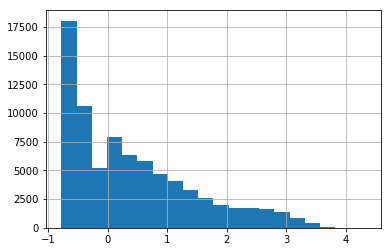

In [19]:
total_hour_per_char.loghours = np.log10(total_hour_per_char.hours)
total_hour_per_char.loghours.hist(bins=20)

# race and class

In [91]:
total_number_avatars = len(df.char.unique()) # number of avatars
print('the total number of avatars are: ', total_number_avatars)

the total number of avatars are:  78172


In [55]:
unique_avatars = df.drop_duplicates('char')
unique_avatars = unique_avatars[['char','race','charclass']]
unique_avatars.head()

,char,race,charclass
0,0,Orc,Warrior
1,1,Orc,Shaman
2,2,Orc,Shaman
3,3,Orc,Warrior
4,4,Orc,Shaman


##### races by number of avatar creations (blue) v.s. by appearance time in game (red)

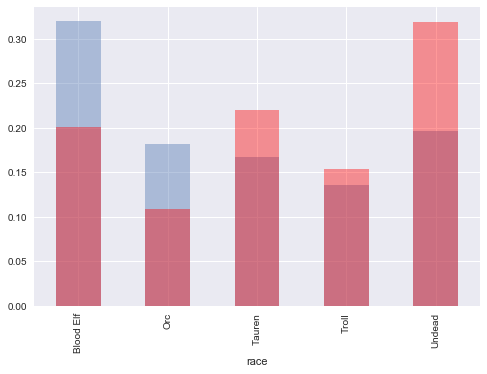

In [86]:
race_group = unique_avatars.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
ax = race_group.plot.bar(grid=True, alpha=0.4)

race_group = df.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
race_group.plot.bar(ax=ax, alpha=0.4, color='r')

* the undead was played more than other races, tauren has a relarive longer play time, where blood elf and orc are less played

#### classes by number of creation (blue) v.s. by appearance time in game (red)

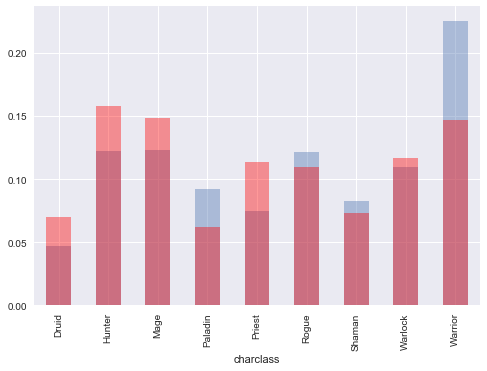

In [82]:
class_group = unique_avatars.groupby(by='charclass').race.count()
class_group = class_group/class_group.sum()
ax = class_group.plot.bar(grid=True, alpha=0.4)

class_group = df.groupby(by='charclass').race.count()
class_group = class_group/class_group.sum()
class_group.plot.bar(alpha=0.4, color='r', ax=ax)

* similar to races, certain classes are played more than others after being created
* classes that have been played more: druid, hunter, mage, priest
* classes that have been played less: paladin, warrior

#### race-class combination by creation (blue) v.s. by appearance time in game (red)

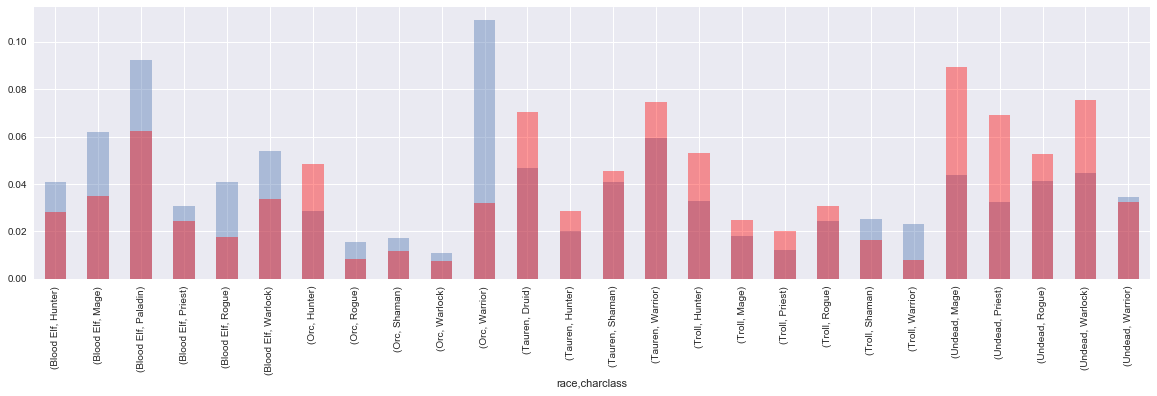

In [81]:
plt.figure(figsize=(20,5))
race_class_group = unique_avatars.groupby(by=['race', 'charclass']).race.count()
race_class_group = race_class_group/race_class_group.sum()
ax = race_class_group.plot.bar(grid=True, alpha=0.4)

race_class_group = df.groupby(by=['race', 'charclass']).race.count()
race_class_group = race_class_group/race_class_group.sum()
race_class_group.plot.bar(ax=ax, alpha=0.4, color='r')

* a lot Orc Warriors had been created but not been much played
* on the other hand, users are more addicted to their Orc Hunter avatars

### the avatars that had been created after the data begins and lasted for longer than 30 days

In [94]:
newchar = df[df.level==1].char.unique()
print('there are ', len(newchar), ' avatars been created since the start of the record of this data')

there are  51204  avatars been created since the start of the record of this data


In [96]:
from datetime import date

day_session_lower = 20
day_duration_lower = 30
d = []
for char in newchar:
    all_times = df[df.char==char].datetime.tolist()
    day_sessions = len(set([t.date() for t in all_times]))
    day_duration = (all_times[-1].date() - all_times[0].date()).days
    
    if day_sessions>day_session_lower and day_duration>day_duration_lower:
        d.append({'char':char, 'login_day': day_sessions, 'duration_days': day_duration})

df_gamelife = pd.DataFrame(d)

In [104]:
print('there are ', len(df_gamelife), 'avatars been played after 30 days of free trial period')

there are  5672 avatars been played after 30 days of free trial period


In [105]:
chars_stayed = df_gamelife.char.tolist()
df_char_stayed = df[df.char.isin(chars_stayed)]

In [108]:
df_char_stayed.to_csv(os.path.join(dirname, 'wowah_chars_stayed.csv'))

In [141]:
dirname

'../Data/wowah/output/'

#### the number of days the avatar stays in the game and number of days the avatar log in to the game

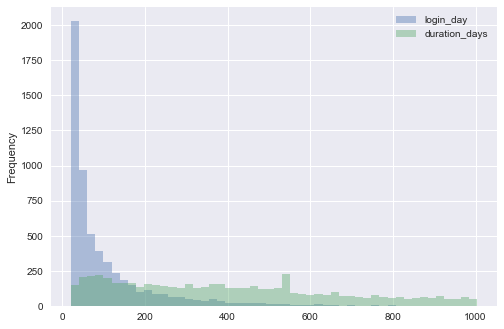

In [97]:
plt.figure(figsize=(20,5))
df_gamelife[['login_day', 'duration_days']].plot(kind='hist', alpha=0.4, bins=50)

In [60]:
df_gamelife = pd.merge(df_gamelife, unique_avatars,how='left', on='char')
df_gamelife.head()

,char,day_sessions,duration_days,race,charclass
0,182,980,1003,Troll,Hunter
1,444,48,303,Orc,Shaman
2,467,298,880,Orc,Warrior
3,494,22,232,Orc,Hunter
4,591,34,651,Undead,Warlock


In [115]:
df_char_stayed[df_char_stayed.char==444].tail(1)

,char,level,race,charclass,zone,guild,sample_idx,datetime
8699142,444,1,Orc,Shaman,Orgrimmar,-1,61,2006-10-31 10:01:43


* sometimes users will create a secondary characters in capital cities (orgrimmar for Horde) to help transfer or trade goods
* there is a thread on the forum discussing about such characters: https://eu.battle.net/forums/en/wow/topic/17289019710

In [116]:
unique_avatars = df_char_stayed.drop_duplicates('char')
unique_avatars = unique_avatars[['char','race','charclass']]
unique_avatars.head()

,char,race,charclass
61,61,Orc,Warrior
87,87,Tauren,Shaman
182,182,Troll,Hunter
247,247,Troll,Mage
319,321,Undead,Mage


#### races by number of creation (blue) v.s. by appearance time in game (red)

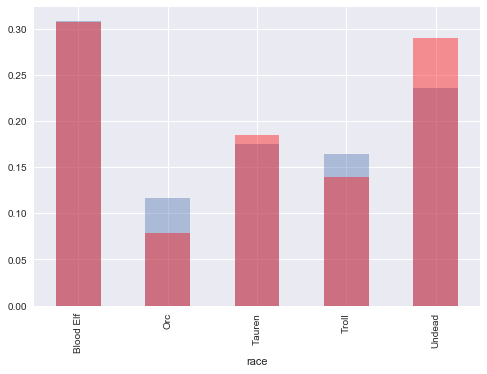

In [117]:
race_group = unique_avatars.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
ax = race_group.plot.bar(grid=True, alpha=0.4)

race_group = df_char_stayed.groupby(by='race').race.count()
race_group = race_group/race_group.sum()
race_group.plot.bar(ax=ax, alpha=0.4, color='r')

#### classes by number of creation (blue) v.s. by appearance time in game (red)

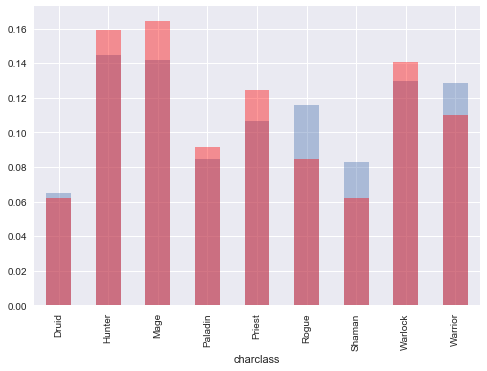

In [118]:
class_group = unique_avatars.groupby(by='charclass').race.count()
class_group = class_group/class_group.sum()
ax = class_group.plot.bar(grid=True, alpha=0.4)

class_group = df_char_stayed.groupby(by='charclass').race.count()
class_group = class_group/class_group.sum()
class_group.plot.bar(alpha=0.4, color='r', ax=ax)

#### race-class combinations by number of creation (blue) v.s. by appearance time in game (red)

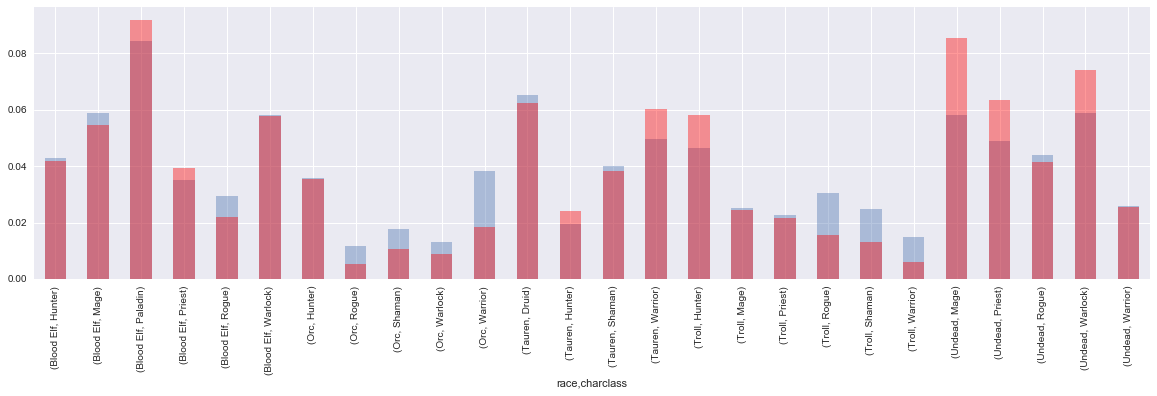

In [119]:
plt.figure(figsize=(20,5))
race_class_group = unique_avatars.groupby(by=['race', 'charclass']).race.count()
race_class_group = race_class_group/race_class_group.sum()
ax = race_class_group.plot.bar(grid=True, alpha=0.4)

race_class_group = df_char_stayed.groupby(by=['race', 'charclass']).race.count()
race_class_group = race_class_group/race_class_group.sum()
race_class_group.plot.bar(ax=ax, alpha=0.4, color='r')

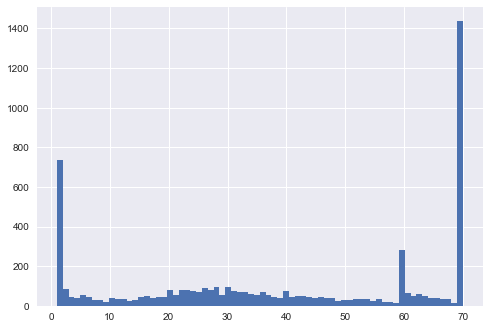

In [123]:
df_char_highest_level = df_char_stayed.drop_duplicates(subset='char', keep='last')
df_char_highest_level.level.hist(bins=70)

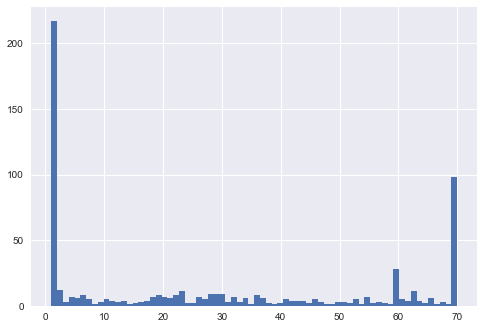

In [125]:
df_char_highest_level.level[df_char_highest_level.race=='Orc'].hist(bins=70)

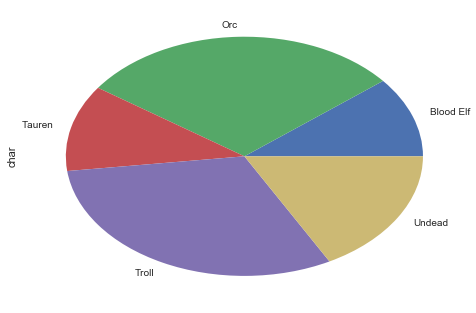

In [140]:
df_char_highest_level[df_char_highest_level.level==1].groupby('race').char.count().plot(kind='pie')

### take a look at the size of guilds

In [151]:
len(unique_avatars.guild.unique())

76

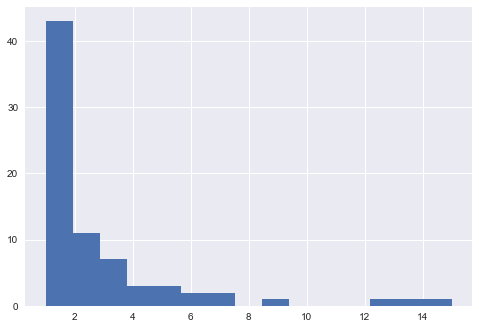

In [149]:
unique_avatars = df_char_stayed.drop_duplicates('char')
df_group_in_guild = unique_avatars.groupby('guild')
df_group_in_guild.char.count()[1:].hist(bins=15)

* what does it mean: guild of only one avatar ??